In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('../ERP000546_genecounts.txt',sep='\t',index_col=0)

In [36]:
data_normcounts = data/data.sum()

In [37]:
log_normcounts = np.log2(data_normcounts+1)

In [43]:
df = log_normcounts.loc[[i for i in list(log_normcounts.index) if '_' not in i]]

In [46]:
df_corrmat = df.corr(method='spearman')

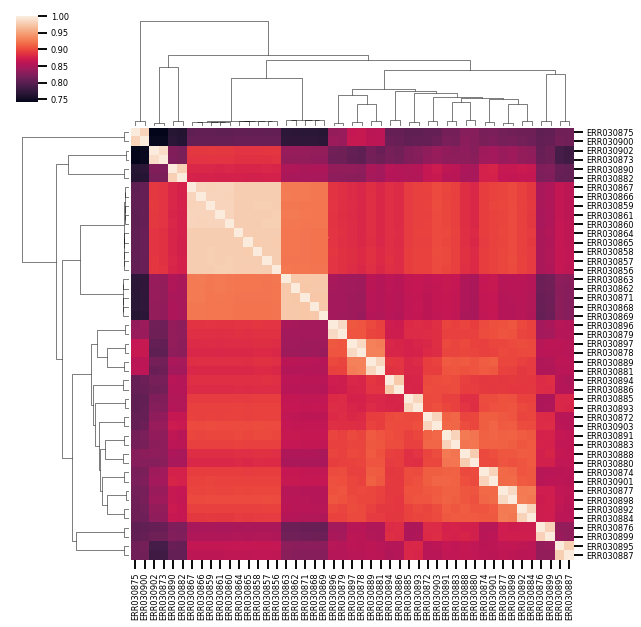

In [47]:
sns.clustermap(df_corrmat)

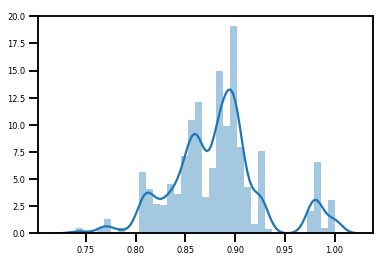

In [48]:
sns.distplot(df_corrmat.values.flatten())

In [49]:
from sklearn.decomposition import PCA

p = PCA(n_components=10)

In [50]:
df = df.T

In [51]:
fit = p.fit(df)

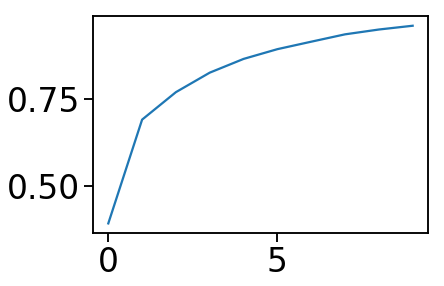

In [69]:
sns.set_context('talk',font_scale=2)
plt.plot(np.cumsum(fit.explained_variance_ratio_))

In [53]:
pca_two = PCA(2)

In [54]:
projected = pca_two.fit_transform(df)

Text(0, 0.5, 'PC2')

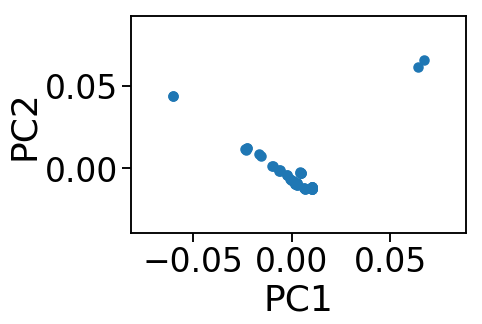

In [71]:
sns.set_context('talk',font_scale=2)
plt.scatter(projected[:,0],projected[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [56]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

In [60]:
centroid = centeroidnp(projected)

In [65]:
centroid

(-1.1257248088785663e-18, -9.596342633063189e-19)

In [66]:
dist = [np.linalg.norm(i-centroid) for i in projected]

Text(0, 0.5, 'Density')

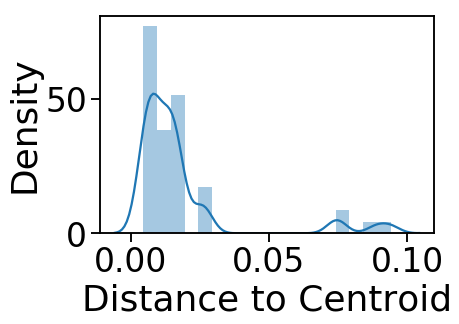

In [72]:
sns.set_context('talk',font_scale=2)
sns.distplot(dist)
plt.xlabel('Distance to Centroid')
plt.ylabel('Density')